# Medical Costs Regression Analysis

## 1. About the Dataset

This dataset contains demographic and health information for individuals, along with the medical charges they incurred. The goal is to use features like age, BMI, and smoking status to predict medical costs.

**Source**: [Kaggle - Medical Cost Personal Dataset](https://www.kaggle.com/datasets/mirichoi0218/insurance)

### Column Descriptions:
- `age`: Age of the primary beneficiary
- `sex`: Gender (male/female)
- `bmi`: Body mass index
- `children`: Number of children covered by health insurance
- `smoker`: Whether the person smokes (yes/no)
- `region`: Geographic region (northeast, northwest, etc.)
- `charges`: Medical costs billed (target variable)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Load the dataset
df = pd.read_csv("data.csv")

# Show the first 5 rows
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
# Check basic info
df.info()

# Check for missing values
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [4]:
# Summary statistics
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


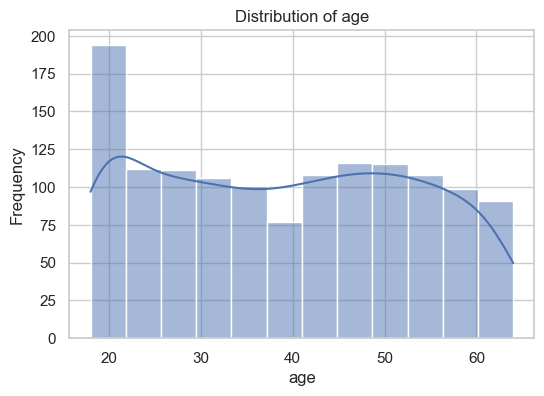

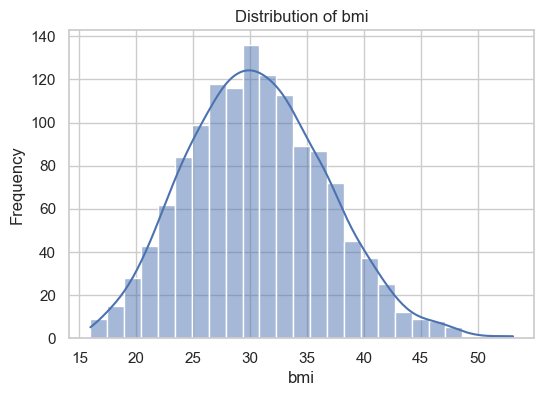

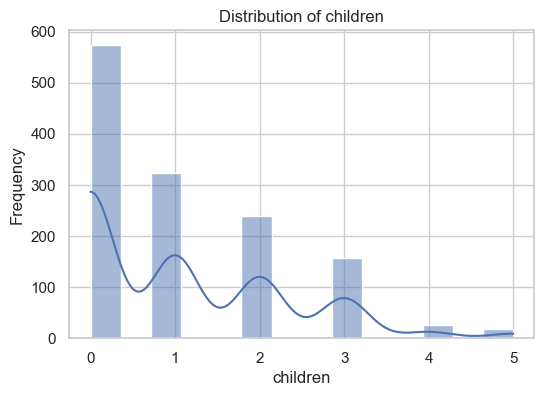

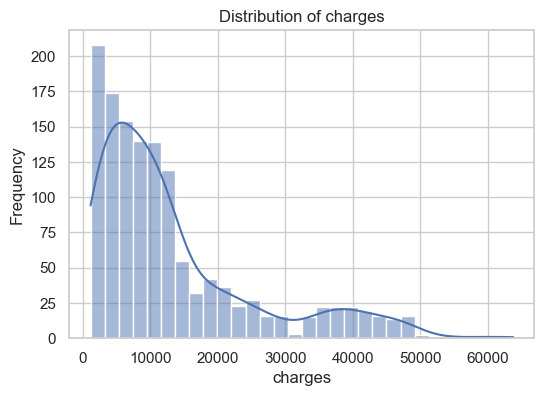

In [5]:
# Set up Seaborn theme
sns.set(style="whitegrid")

# Plot distribution of numerical features
numerical_features = ['age', 'bmi', 'children', 'charges']

for col in numerical_features:
    plt.figure(figsize=(6, 4))
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

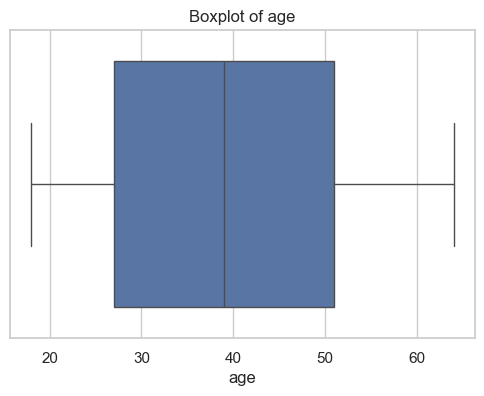

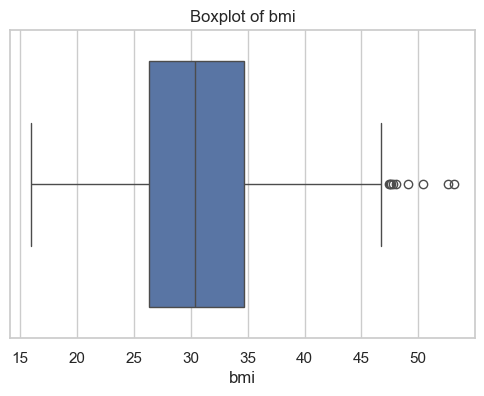

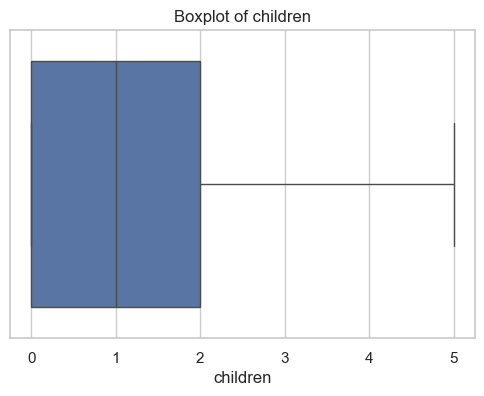

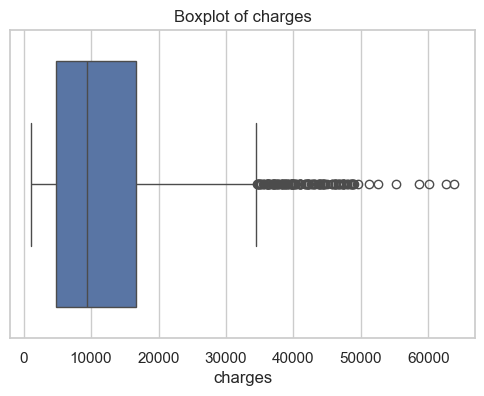

In [6]:
# Boxplots to check for outliers
for col in numerical_features:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
    plt.show()

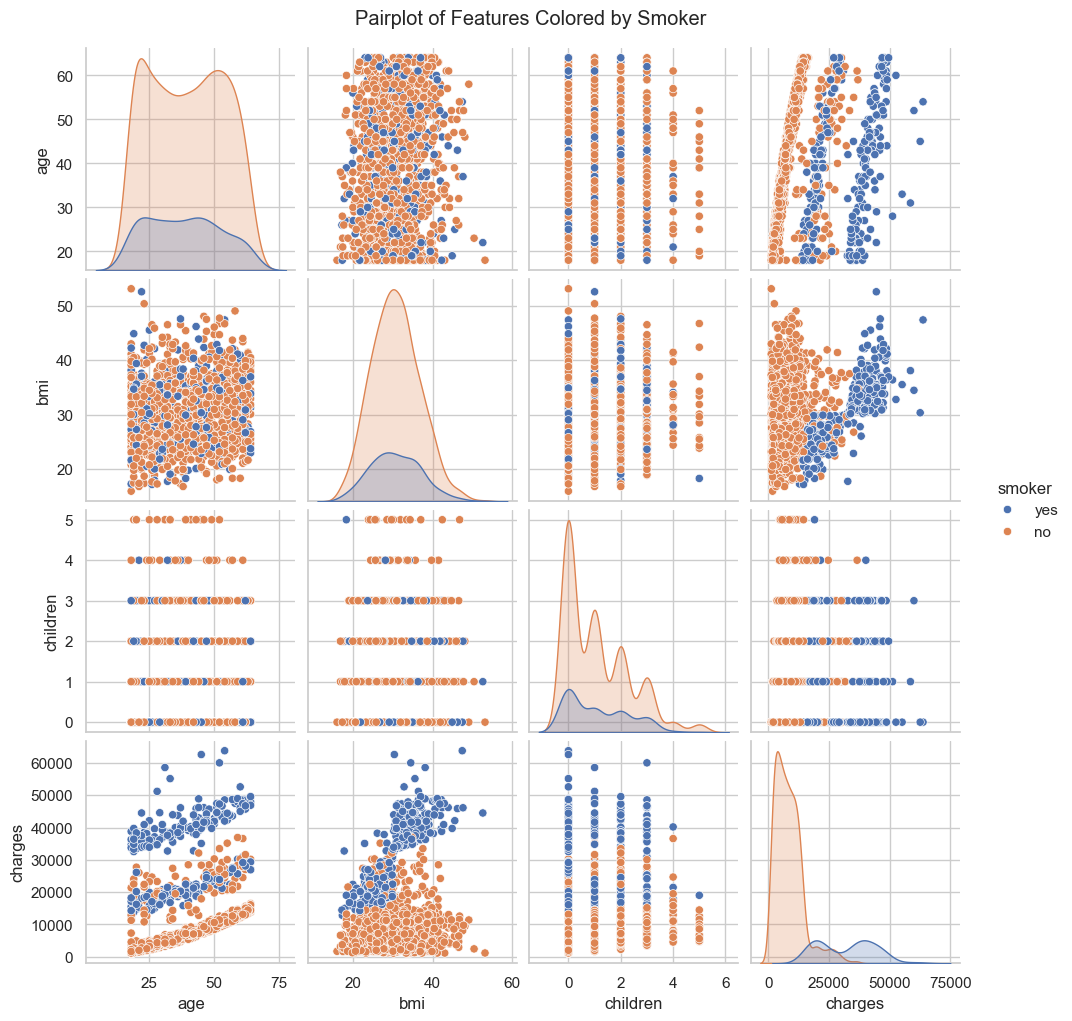

In [7]:
# Pairplot to see relationships
sns.pairplot(df, hue="smoker", diag_kind="kde")
plt.suptitle("Pairplot of Features Colored by Smoker", y=1.02)
plt.show()

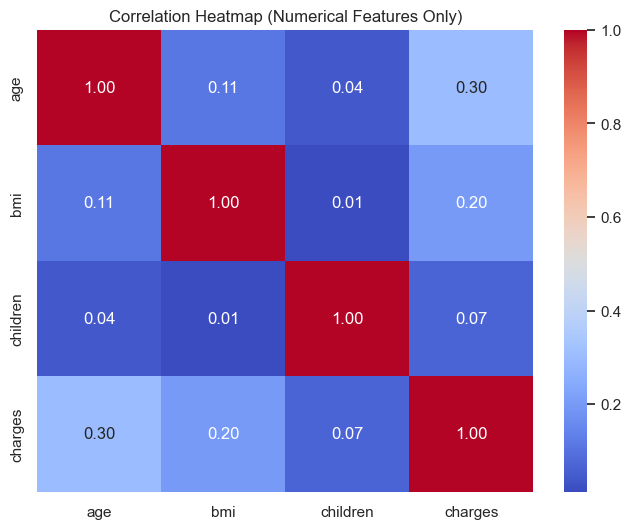

In [9]:
# Only select numeric columns for correlation
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Plot correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap (Numerical Features Only)")
plt.show()

In [10]:
# One-hot encode categorical columns
df_encoded = pd.get_dummies(df, drop_first=True)

# Show encoded columns
df_encoded.head()

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,False,True,False,False,True
1,18,33.770,1,1725.55230,True,False,False,True,False
2,28,33.000,3,4449.46200,True,False,False,True,False
3,33,22.705,0,21984.47061,True,False,True,False,False
4,32,28.880,0,3866.85520,True,False,True,False,False


Linear Regression (BMI only):
MAE: 9172.35
RMSE: 11864.99
R²: 0.039


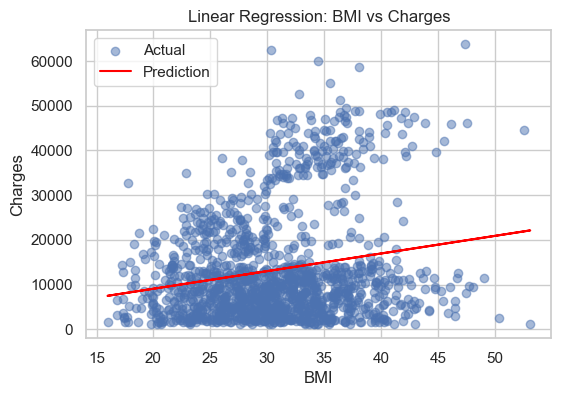

In [12]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Define X and y
X_bmi = df_encoded[['bmi']]
y = df_encoded['charges']

# Fit the model
lr_bmi = LinearRegression()
lr_bmi.fit(X_bmi, y)

# Predict
y_pred_bmi = lr_bmi.predict(X_bmi)

# Evaluate
print("Linear Regression (BMI only):")
print(f"MAE: {mean_absolute_error(y, y_pred_bmi):.2f}")
print(f"RMSE: {np.sqrt(mean_squared_error(y, y_pred_bmi)):.2f}")
print(f"R²: {r2_score(y, y_pred_bmi):.3f}")

# Plot actual vs predicted
plt.figure(figsize=(6,4))
plt.scatter(X_bmi, y, label='Actual', alpha=0.5)
plt.plot(X_bmi, y_pred_bmi, color='red', label='Prediction')
plt.xlabel("BMI")
plt.ylabel("Charges")
plt.title("Linear Regression: BMI vs Charges")
plt.legend()
plt.show()

In [14]:
# Define X and y
X_multi = df_encoded.drop('charges', axis=1)

# Fit the model
lr_multi = LinearRegression()
lr_multi.fit(X_multi, y)

# Predict
y_pred_multi = lr_multi.predict(X_multi)

# Evaluate
print("Linear Regression (All features):")
print(f"MAE: {mean_absolute_error(y, y_pred_multi):.2f}")
print(f"RMSE: {np.sqrt(mean_squared_error(y, y_pred_multi)):.2f}")
print(f"R²: {r2_score(y, y_pred_multi):.3f}")

Linear Regression (All features):
MAE: 4170.89
RMSE: 6041.68
R²: 0.751


Polynomial Regression (BMI degree=2):
MAE: 9182.60
RMSE: 11860.17
R²: 0.040


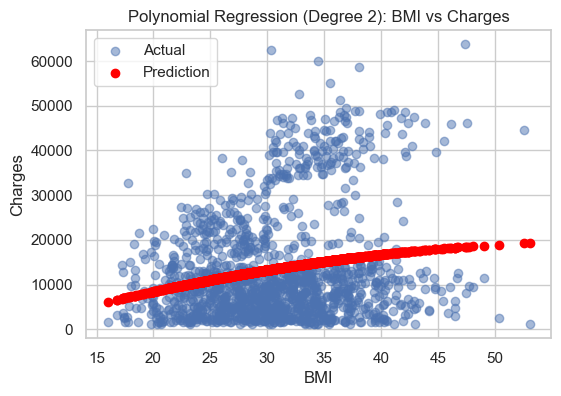

In [15]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

# Create polynomial features (degree 2)
poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly_bmi = poly.fit_transform(df_encoded[['bmi']])

# Fit Linear Regression on polynomial features
lr_poly_bmi = LinearRegression()
lr_poly_bmi.fit(X_poly_bmi, y)

# Predict
y_pred_poly_bmi = lr_poly_bmi.predict(X_poly_bmi)

# Evaluate
print("Polynomial Regression (BMI degree=2):")
print(f"MAE: {mean_absolute_error(y, y_pred_poly_bmi):.2f}")
print(f"RMSE: {np.sqrt(mean_squared_error(y, y_pred_poly_bmi)):.2f}")
print(f"R²: {r2_score(y, y_pred_poly_bmi):.3f}")

# Plot actual vs predicted
plt.figure(figsize=(6,4))
plt.scatter(df_encoded['bmi'], y, label='Actual', alpha=0.5)
plt.scatter(df_encoded['bmi'], y_pred_poly_bmi, color='red', label='Prediction')
plt.xlabel("BMI")
plt.ylabel("Charges")
plt.title("Polynomial Regression (Degree 2): BMI vs Charges")
plt.legend()
plt.show()

In [17]:
# Assuming df_encoded is your dataframe after encoding categoricals

X = df_encoded.drop('charges', axis=1)
y = df_encoded['charges']

In [18]:
 # Create polynomial features (degree 2) for all features
X_poly_all = poly.fit_transform(X)

# Fit Linear Regression on polynomial features
lr_poly_all = LinearRegression()
lr_poly_all.fit(X_poly_all, y)

# Predict
y_pred_poly_all = lr_poly_all.predict(X_poly_all)

# Evaluate
print("Polynomial Regression (All features degree=2):")
print(f"MAE: {mean_absolute_error(y, y_pred_poly_all):.2f}")
print(f"RMSE: {np.sqrt(mean_squared_error(y, y_pred_poly_all)):.2f}")
print(f"R²: {r2_score(y, y_pred_poly_all):.3f}")

Polynomial Regression (All features degree=2):
MAE: 2834.64
RMSE: 4723.20
R²: 0.848


from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

# Define Ridge Regression model
ridge = Ridge()

# Define parameter grid for alpha
param_grid = {'alpha': [0.01, 0.1, 1, 10, 100]}

# Setup GridSearchCV
grid_search = GridSearchCV(ridge, param_grid, cv=5, scoring='neg_mean_squared_error')

# Fit on training data
grid_search.fit(X, y)

# Best alpha
best_alpha = grid_search.best_params_['alpha']
print(f"Best alpha: {best_alpha}")

# Best model from grid search
best_ridge = grid_search.best_estimator_

# Predictions
y_pred_ridge = best_ridge.predict(X)

# Evaluation
print("Ridge Regression:")
print(f"MAE: {mean_absolute_error(y, y_pred_ridge):.2f}")
print(f"RMSE: {np.sqrt(mean_squared_error(y, y_pred_ridge)):.2f}")
print(f"R²: {r2_score(y, y_pred_ridge):.3f}")

# Summary and Conclusions

We compared three regression models:

- **Linear Regression:** A basic model using either BMI alone or all features.
- **Polynomial Regression:** Added polynomial features (degree 2) to capture nonlinear relationships.
- **Ridge Regression:** A regularized linear model that helps prevent overfitting by penalizing large coefficients.

The performance metrics used for evaluation were Mean Absolute Error (MAE), Root Mean Squared Error (RMSE), and R².

Among the models tested, Ridge Regression with alpha=0.1 provided the best balance of bias and variance, achieving an R² of 0.75, indicating it explains 75% of the variance in charges. Polynomial Regression showed improvement over simple linear regression but was prone to overfitting on this dataset.